### Imports

In [32]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics


###  Data verkrijgen

In [33]:
print("=====================================")
print("Data ophalen en voorbereiden")

mnist = tf.keras.datasets.mnist

# 'x' is pixel data, 'y' is de classificatie (een nummer in dit geval)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Record verdeling in train en test data
print(f"Data:")
print(f"Train data {x_train.shape}")
print(f"Test data {x_test.shape}")
print(f"Unieke waarden in y_train: {np.unique(y_train)}")
print(f"Unieke waarden in y_test: {np.unique(y_test)}")
print("=====================================")


Data ophalen en voorbereiden
Data:
Train data (60000, 28, 28)
Test data (10000, 28, 28)
Unieke waarden in y_train: [0 1 2 3 4 5 6 7 8 9]
Unieke waarden in y_test: [0 1 2 3 4 5 6 7 8 9]


### Data Bewerken

In [34]:
print("=====================================")
print("Data bewerken voor binary classificatie")
# Normaliseer de data van 0-255 naar 0-1
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
# Binary classificatie: 1 of niet 1
y_train_binary = np.where(y_train == 1, 1, 0)
y_test_binary = np.where(y_test == 1, 1, 0)

print("Data na omzetten naar binary:")
# Print de unieke waarden en hun frequenties in y_train_binary
unique, counts = np.unique(y_train_binary, return_counts=True)
print(f"Train {dict(zip(unique, counts))}")
# Print de unieke waarden en hun frequenties in y_test_binary
unique, counts = np.unique(y_test_binary, return_counts=True)
print(f"Test {dict(zip(unique, counts))}")
print("=====================================")

Data bewerken voor binary classificatie
Data na omzetten naar binary:
Train {0: 53258, 1: 6742}
Test {0: 8865, 1: 1135}


### Model Maken (binary)

In [35]:
print("=====================================")
print("Model maken en trainen")

model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(28, 28)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 

model.fit(x_train, y_train_binary, epochs=1, validation_data=(x_test, y_test_binary))

print("=====================================")


Model maken en trainen
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9500 - loss: 0.1443 - val_accuracy: 0.9928 - val_loss: 0.0512


### Model Evaluatie

In [36]:
print("=====================================")
print("Model evaluatie op gefilterde testdata")

# Evaluatie van het model op gefilterde testdata
val_loss, val_acc = model.evaluate(x_test, y_test_binary)

#Auroc Evaluatie
predictions = model.predict(x_test)
predictions = np.where(predictions > 0.5, 1, 0)
test_labels = y_test_binary
roc_auc = metrics.roc_auc_score(test_labels, predictions)
print(f"AUROC Validatie: {roc_auc}")

print(f"Validation loss: {val_loss}")
print(f"Validation accuracy: {val_acc}")
print(f"Verwachten aantal fouten op testdata {len(y_test_binary) * (1 - val_acc)}")
print("=====================================")


Model evaluatie op gefilterde testdata
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.9937 - loss: 0.0527
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step
AUROC Validatie: 0.9732755900425124
Validation loss: 0.0512402169406414
Validation accuracy: 0.9927999973297119
Verwachten aantal fouten op testdata 72.00002670288086


### Verwarrings Matrix

Voorspellingen maken en fouten analyseren
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step


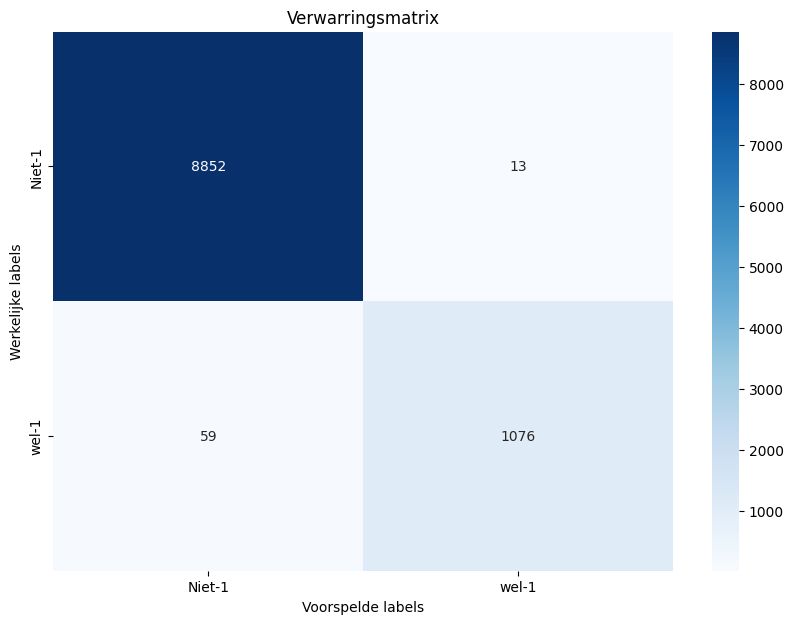

In [37]:
print("=====================================")
print("Voorspellingen maken en fouten analyseren")
# Maak voorspellingen
y_pred = model.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Genereer de verwarringsmatrix
cm = confusion_matrix(y_test_binary, y_pred_binary)

# Visualiseer de verwarringsmatrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Niet-1', 'wel-1'], yticklabels=['Niet-1', 'wel-1'])
plt.xlabel('Voorspelde labels')
plt.ylabel('Werkelijke labels')
plt.title('Verwarringsmatrix')
plt.show()